In [9]:
import numpy as np
import xarray
import datetime

In [10]:
fname = '/g/data/w40/clv563/ozflux_data/Samford_2022_L3.nc'

In [11]:
# Time period we are looking at:
tstart = datetime.datetime(2022,2,22)
tend = datetime.datetime(2022,3,8)


#time=slice(datetime.datetime(1979,1,1), datetime.datetime(2021,12,31))


In [3]:
latent_heat_flux_name = 'Fe'
sensible_heat_flux_name = 'Fh_PFP'

In AUS2200 files, sensible heat flux is hfss and latent heat flux is hfls

In [4]:
ds = xarray.open_dataset(fname)

latent_hfx_obs = ds.Fe
sensible_hfx_obs = ds.Fh_PFP

In [21]:
latent_hfx_obs

<xarray.DataArray 'Fe' (time: 6296, latitude: 1, longitude: 1)>
[6296 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-05-12T03:30:00
  * latitude   (latitude) float64 -27.39
  * longitude  (longitude) float64 152.9
Attributes:
    coverage_L3:       59%
    description_L3:    WPL corrected
    height:            3.75m
    instrument:        WindMaster Pro,LI-7500DS
    long_name:         Latent heat flux
    rangecheck_lower:  -100
    rangecheck_upper:  600
    standard_name:     surface_upward_latent_heat_flux
    statistic_type:    average
    units:             W/m^2
    valid_range:       [-100.  600.]

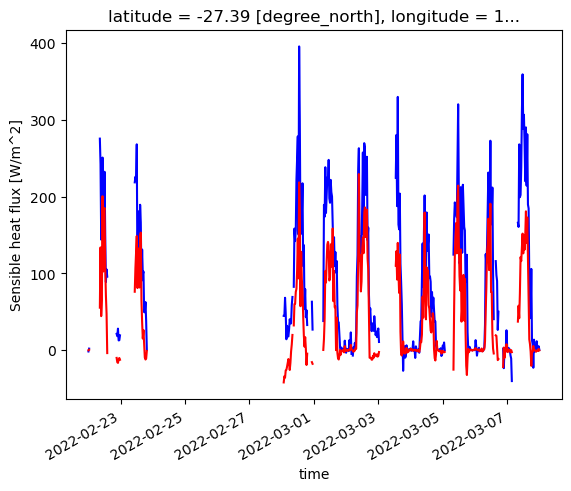

In [37]:
latent_hfx_obs_timeselect = latent_hfx_obs.sel(time=slice(tstart, tend))
sensible_hfx_obs_timeselect = sensible_hfx_obs.sel(time=slice(tstart, tend))

latent_hfx_obs_timeselect = np.squeeze(latent_hfx_obs_timeselect[:,0,0])
sensible_hfx_obs_timeselect = np.squeeze(sensible_hfx_obs_timeselect[:,0,0])

latent_hfx_obs_timeselect[np.array(latent_hfx_obs_timeselect < -100)] = np.nan
sensible_hfx_obs_timeselect[np.array(sensible_hfx_obs_timeselect < -100)] = np.nan


latent_hfx_obs_timeselect.plot(color='b')
sensible_hfx_obs_timeselect.plot(color='r')
